In [32]:
# Import Section
import csv
import codecs
import sys
import io
import numpy as np
import pandas as pd
import scipy as sp
import math

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statistics import mean

from sklearn.ensemble import AdaBoostRegressor

# Python script for confusion matrix creation. 
from sklearn.metrics import *
from numpy import mean
from numpy import std
from sklearn import metrics


import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
dataset=pd.read_excel("Des_cod_1056_92-29.xlsx",index_col=0)

In [34]:
dataset.shape

(1056, 30)

In [35]:
x = dataset.drop(['Act'],axis=1).astype (float)
y = dataset['Act']

In [36]:
x.shape

(1056, 29)

In [37]:
y 

Structure
"1Co"       0.853
"2Co"       0.987
"3Co"       0.773
"4Co"       0.760
"5Co"       0.893
            ...  
"1052Co"    0.370
"1053Co"    1.020
"1054Co"    0.832
"1055Co"    0.701
"1056Co"    1.090
Name: Act, Length: 1056, dtype: float64

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state = 47, shuffle=True)

In [39]:
x_train.shape

(844, 29)

In [40]:
x_test.shape

(212, 29)

In [41]:
# scealing is required for indepandent variables at AdaBooster
from sklearn.preprocessing import StandardScaler

In [42]:
scale = StandardScaler()

In [43]:
scale.fit (x_train, y_train)

StandardScaler()

In [44]:
X_train = scale.fit_transform(x_train)
X_test = scale.fit_transform(x_test)

In [45]:
#AdaBoostRegressor?

In [46]:
regressor = AdaBoostRegressor( base_estimator=None, learning_rate = 3,  loss = "linear", n_estimators = 96, random_state = 0)

In [47]:
import time
from datetime import timedelta
start_time = time.monotonic()

In [48]:
 regressor.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=3, n_estimators=96, random_state=0)

In [49]:
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

0:00:01.125000


In [50]:
# compute the testing accuracy
y_pred = regressor.predict(X_test)

In [51]:
y_pred_train = regressor.predict(X_train)

In [52]:
y_pred_train.shape

(844,)

In [53]:
  print("\n")
  print("overall Performance: ", )



overall Performance: 


In [54]:
  # model evaluation for test set
  mae = metrics.mean_absolute_error(y_test, y_pred)
  mse = metrics.mean_squared_error(y_test, y_pred)
  r2 = metrics.r2_score(y_test, y_pred)

In [55]:
print("The model performance for test set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for test set
--------------------------------------
MAE is 0.30549234999386443
MSE is 0.13391115059766473
R2 score is 0.4870888345177605


In [56]:
  # model evaluation for training set
maeTrain = metrics.mean_absolute_error(y_train, y_pred_train)
mseTrain = metrics.mean_squared_error(y_train, y_pred_train)
r2Train = metrics.r2_score(y_train, y_pred_train)

In [57]:
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(maeTrain))
print('MSE is {}'.format(mseTrain))
print('R2 score is {}'.format(r2Train))

The model performance for training set
--------------------------------------
MAE is 0.2836394432022152
MSE is 0.10151465275662237
R2 score is 0.5604377209410096


In [58]:
cvscoretrain = (cross_val_score(regressor,X_train,y_train.ravel(),cv=5).mean())

In [59]:
print("The CV score for training set")
print("--------------------------------------")
print (cross_val_score(regressor,X_train,y_train.ravel(),cv=5))
print('Q2 is {}'.format(cvscoretrain))

The CV score for training set
--------------------------------------
[0.38532494 0.39931329 0.40509821 0.40825702 0.46069653]
Q2 is 0.4117379981320154


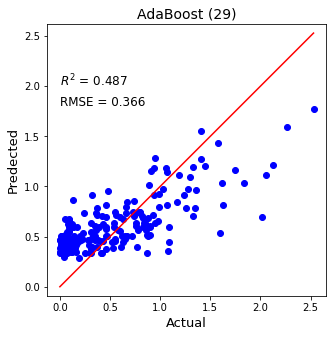

In [60]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'red')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.487', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.366', fontsize = 12)
plt.title('AdaBoost (29)', fontsize = 14)
plt.show()

In [61]:
import statsmodels.api as sm

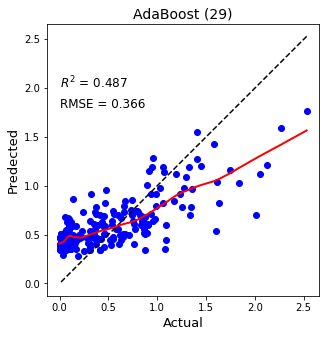

In [62]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o', linewidth=1)
plt.yscale('linear')
plt.xscale('linear')


p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], c='black', linestyle='dashed')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('scaled')
plt.text(0, 2, '$R^2$ = 0.487', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.366', fontsize = 12)
plt.title('AdaBoost (29)', fontsize = 14)

# Draw a Loess best-fit line over the scatter plot
lowess = sm.nonparametric.lowess
loess_fit = lowess(y_pred, y_test, frac=0.3)
# Plot the loess fit line on the scatter plot
plt.plot(loess_fit[:, 0], loess_fit[:, 1], 'r-', linewidth=2)

plt.show()


In [30]:
#Randomize search CV
from sklearn.model_selection import RandomizedSearchCV

In [50]:
# creatting parameter gride
param_grid_regressor= {'n_estimators':[ 50, 90, 95, 100, 105, 110, 115, 120, 125, 130, 150, 200 ], 
    'loss': ['linear', 'square', 'exponential'], 'learning_rate': [1,2,3,4, 5, 6] }

In [51]:
print (param_grid_regressor)

{'n_estimators': [50, 90, 95, 100, 105, 110, 115, 120, 125, 130, 150, 200], 'loss': ['linear', 'square', 'exponential'], 'learning_rate': [1, 2, 3, 4, 5, 6]}


In [52]:
regressor_random = RandomizedSearchCV(estimator = regressor, param_distributions=param_grid_regressor, n_iter = 100,
                              cv = 5, verbose =2,
                              n_jobs= -1, scoring = 'neg_mean_squared_error' )

In [53]:
regressor_random.fit (X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(learning_rate=3,
                                               n_estimators=100,
                                               random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [1, 2, 3, 4, 5, 6],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 90, 95, 100, 105,
                                                         110, 115, 120, 125,
                                                         130, 150, 200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [54]:
regressor_random.best_params_

{'n_estimators': 120, 'loss': 'linear', 'learning_rate': 3}

In [55]:
regressor_random.best_score_

-0.13155014146668736

In [80]:
# parameter tuning grid searchCV
from sklearn.model_selection import GridSearchCV

In [81]:
param_grid_regressor1= {'n_estimators':[ 50, 90, 95,96, 97, 98, 99, 100, 101, 102, 103, 104,
                                        105, 110, 115, 120, 125, 130, 150, 200 ], 
    'loss': ['linear', 'square', 'exponential'], 'learning_rate': [1,2,3,4, 5, 6] }

In [82]:
regressor_grid = GridSearchCV(estimator =regressor, param_grid=param_grid_regressor1,
                              cv = 5, verbose =2,
                              n_jobs= -1,  scoring = "neg_mean_squared_error")

In [83]:
regressor_grid.fit (X_train,y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(learning_rate=3, n_estimators=100,
                                         random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [1, 2, 3, 4, 5, 6],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 90, 95, 96, 97, 98, 99, 100, 101,
                                          102, 103, 104, 105, 110, 115, 120,
                                          125, 130, 150, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [84]:
regressor_grid.best_params_

{'learning_rate': 3, 'loss': 'linear', 'n_estimators': 96}

In [85]:
regressor_grid.best_score_

-0.13085775612763123